<a href="https://colab.research.google.com/github/javadvahid/ML-course/blob/main/ML_course_project9_1_anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Anomaly Detection

# تشخیص ناهنجاری  

در این پروژه هدف تخشیص سرور های معیوب بر روی شبکه هست

داده این بخش اول دو ویژگی از هر سرور می باشد

throughput

delay

In [1]:
#load data set
#لود کردن داده های موجود
# در اولین مرحله فایل مربوط به دیتای بخش اول را آپلود کنید
#import numpy
import numpy as np
from scipy.io import loadmat


 
#داده ها را از فایل مشخص شده بخوانید
data1 = loadmat("/content/project9data1.mat")

#show a summary of data
#نمایش خلاصه ای از داده ها
data1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'Xval', 'yval'])

In [2]:
print(data1["X"].shape)

(307, 2)


In [3]:
#split the data into input X and Xval Yval
#داده ها ی ورودی و خروجی را در دو متغیر جدا میریزیم
#input
X = data1["X"]

Xval = data1['Xval']

Yval = data1['yval']

#find m
m = X.shape[0]
print(m)

307


In [ ]:
X.shape

# Data Visualization:

# نمایش داده ها

Text(0, 0.5, 'Throughput (mb/s)')

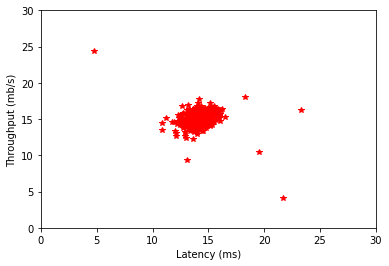

In [6]:
import matplotlib.pyplot as plt
plt.plot(X[:,0], X[:,1], 'r*')
plt.axis([0, 30, 0, 30])
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')

# Anomaly detection Algorithm

<p align="center" width="100%">
    <img width="100%" src="https://drive.google.com/uc?id=1jmJTiACQbSwg2WIJKFJg5F8T1MhU4kuH">
</p>

In [7]:
print(X.shape)

(307, 2)


In [8]:
#gaussian distribution
def gaussianDist(X):
  m, n = X.shape

  mu = np.zeros(n)
  sigma2 = np.zeros(n)

    
  for i in range(n):
    mu[i] = np.sum(X[:,i])/m
    sigma2[i] = np.sum(np.square(X[:,i]-mu[i]))/m
  #print(sigma2)
    
  return mu, sigma2

In [9]:
mu, sigma2 = gaussianDist(X)


In [11]:
sigma2

array([1.83263141, 1.70974533])

In [12]:
#create a function to compute p(x) 
def p_x(X, mu, sigma2):
  prob = (1/(np.sqrt(2*np.pi) * np.sqrt(sigma2))) * np.exp(-((X - mu)**2)/(2*sigma2))
  p_final = np.prod(prob, axis=1)
  return p_final

In [13]:
p = p_x(X, mu, sigma2)

In [14]:
#select epsilon
def selectThreshold(Yval, pval):
    
    bestEpsilon = 0
    bestF1 = 0
    F1 = 0
    
    for epsilon in np.linspace(1.01*min(pval), max(pval), 1000):

        predictions = (pval < epsilon)
        
        tp = np.sum((predictions == Yval) & (Yval == 1))
        
        fp = np.sum((predictions == 1) & (Yval == 0))
        
        fn = np.sum((predictions == 0) & (Yval == 1))
        
        prec = tp / (tp + fp)
        rec = tp / (tp + fn)
        #print(prec)
        F1 = 2 * prec * rec / (prec + rec)
        #
        if F1 > bestF1:
            bestF1 = F1
            bestEpsilon = epsilon

    return bestEpsilon, bestF1

In [15]:

pval = p_x(Xval, mu, sigma2)

epsilon, F1 = selectThreshold(Yval[:,0], pval)

In [17]:
print('Best epsilon found using cross-validation: %.2e' % epsilon)
print('Best F1 on Cross Validation Set          : %f\n' % F1)
print('  (you should see a value epsilon of about 9e-05)')
print('   (you should see a Best F1 value of       0.875000)')
print('\n# Outliers found: %d' % np.sum(p < epsilon))

Best epsilon found using cross-validation: 9.00e-05
Best F1 on Cross Validation Set          : 0.875000

  (you should see a value epsilon of about 9e-05)
   (you should see a Best F1 value of       0.875000)

# Outliers found: 6


In [ ]:
#exercise practice on project9data2.mat
#report the best epsilon and F1score
